In [21]:
#import libraries to use
import time
start_time = time.time()

import utils.slab as slab
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


### 1. CREATE A SLAB OBJECT

A slab object is built with the attributes contained in the `input.json` file and  `scaling_relationship.json` file, and other attributes are computed internally based on the input information.

In [2]:
#Specify input json file and scaling_relationship file paths
input_file='../config_files/Parameters/input.json'
scaling_file='../config_files/Parameters/scaling_relationship.json'

#Initialize an instance of the class Slab with the input files
Slab_obj=slab.Slab(input_file,scaling_file)

reading input.json file
reading scaling_relationship.json file
Great! You already have nodes and cells, I'm just writing

reading mesh


First we need to compute or load the matrix distance and the connectivity matrix of the mesh, and compute the mesh' elements areas

In [5]:
Slab_obj.Element2Element()
Slab_obj.compute_matrix_distance()
Slab_obj.compute_area()

Distance matrix computed!


PLOT SLAB MESH AND THE COMPUTED SPDF


/home/mmojica10/pyANTI-FASc/bin/utils/plot_utils.py:110: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(scaled_tick_labels)


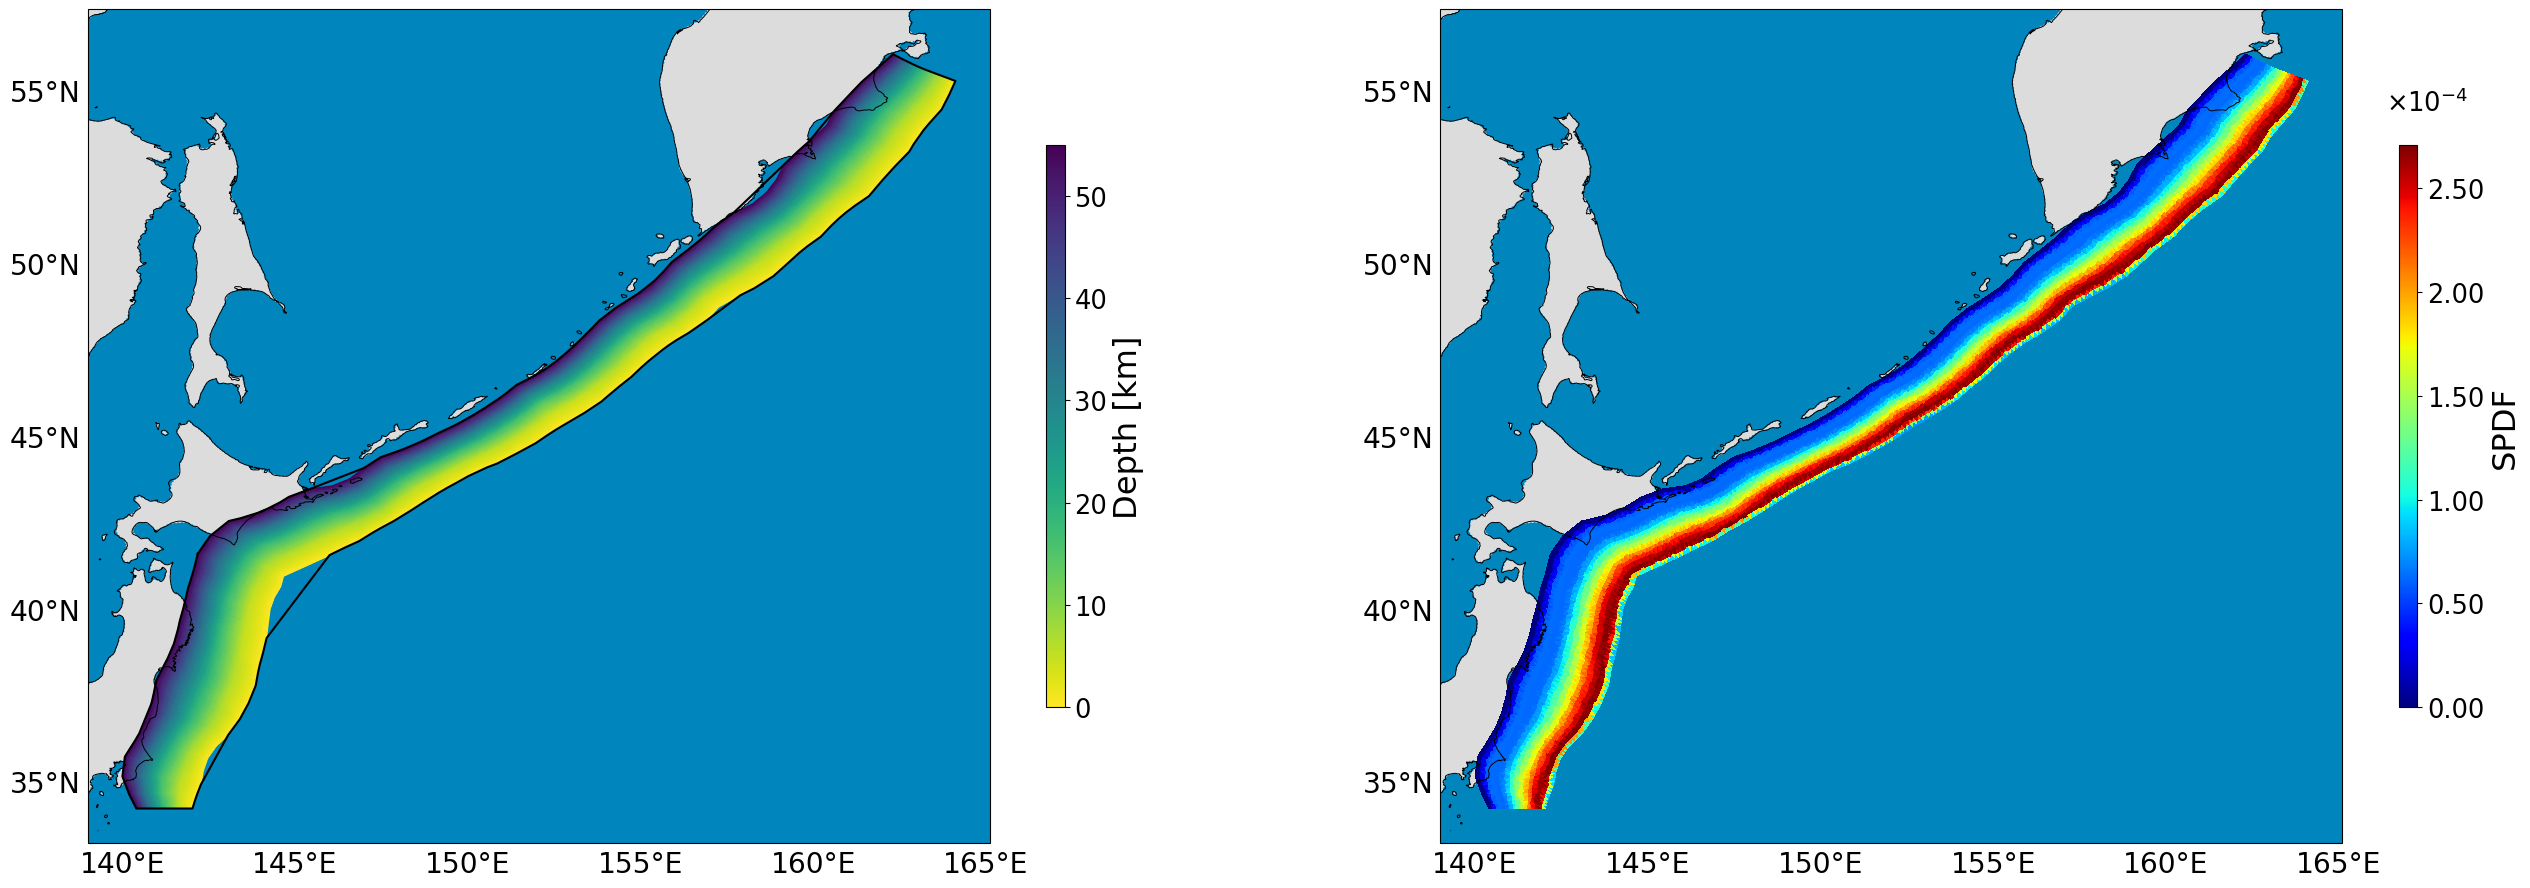

In [7]:
#plot slab and SPDF (Slip Probability Density Function)
print('PLOT SLAB MESH AND THE COMPUTED SPDF')
#PLOT SLAB MESH AND COMPUTED SPDF

fig = plt.figure(figsize=(32, 16))
subplots=121
#generate default basemap
fig,ax=Slab_obj.plot_basemap(fig,subplots)
#Plot Slab mesh
Slab_obj.plot_slab(ax,fig,colorbar=True)
Slab_obj.plot_boundary(ax)
subplots=122
#generate default basemap
fig,ax1=Slab_obj.plot_basemap(fig,subplots)
#Plot SPDF 
ax1,sc, cbar=Slab_obj.plot_SPDF(ax1,fig,colorbar=True, save=True)








### 2. SELECTION OF RUPTURE BARYCENTERS

The second step will generate a selection of rupture barycenters having a fixed `minimum_interdistance`
this distance is optimised to avoid to have too much similar rupture areas, in particular for large magnitude values. 
This selection is based on the magnitude binning and the selected scaling laws that are set in the file `scaling_relationships.json`.
For this, apply the method `active_barycenters()` to and subsequently the method `select_barycenter2()`.




In [8]:
#Select active barycenters for the whole subduction 
Slab_obj.active_barycenters()
#Selection of barycenters for case-study or hazard
Slab_obj.select_barycenter2()

Barycenter selection
Magnitude bin # 15 - Mw=8.8846
Magnitude bin # 16 - Mw=8.9588
Magnitude bin # 17 - Mw=9.0260
Magnitude bin # 18 - Mw=9.0869
Magnitude bin # 19 - Mw=9.1419
Barycenter selection (PTF)
Magnitude bin # 15 - Mw=8.8846
Magnitude bin # 16 - Mw=8.9588
Magnitude bin # 17 - Mw=9.0260
Magnitude bin # 18 - Mw=9.0869
Magnitude bin # 19 - Mw=9.1419


We can check the Mw and scaling relationships for which rupturing barycenters were selected

In [9]:
print(f'Mw: {Slab_obj.get_magnitudes()}')
print(f'Scaling names: {Slab_obj.Name_scaling}')

Mw: [8.8846 8.9588 9.026  9.0869 9.1419]
Scaling names: ['Murotani', 'Strasser']


Now, let's choose from the lists above a combination of magnitude and scaling relationship and plot the respective rupturing barycenters. 

PLOT BARYCENTERS FOR  Mw=8.8846 and SCALING NAME: Murotani


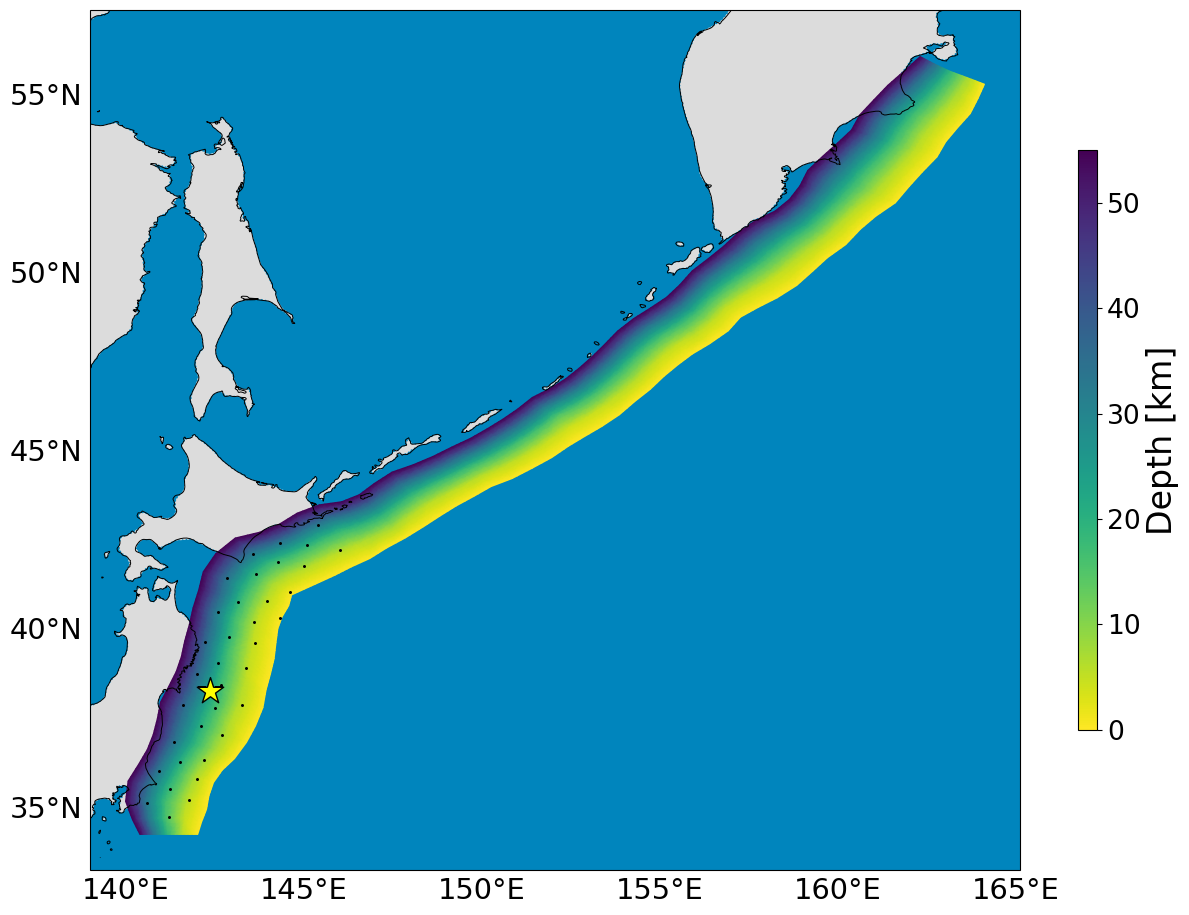

In [11]:
#plot barycenters for the specified combination of Mw and scaling relationship
Mw=8.8846
scaling='Murotani'

print(f'PLOT BARYCENTERS FOR  Mw={Mw} and SCALING NAME: {scaling}')


fig = plt.figure(figsize=(15, 15))
subplots=111
#generate default basemap
fig,ax=Slab_obj.plot_basemap(fig,subplots)

#plot Slab mesh
Slab_obj.plot_slab(ax,fig,colorbar=True)

#PLOT BARYCENTERS
Slab_obj.plot_barycenters_mag(Mw,scaling,ax,fig)


### 3. RUPTURE AREAS COMPUTE

Compute the rupturing areas for every barycenter in each combination of magnitude and scaling relationship by applying the method `rupture_areas()`

In [12]:
Slab_obj.rupture_areas()

Rupturing area computation
Magnitude bin # 15 - Mw=8.8846
Magnitude bin # 16 - Mw=8.9588
Magnitude bin # 17 - Mw=9.0260
Magnitude bin # 18 - Mw=9.0869
Magnitude bin # 19 - Mw=9.1419
Rupturing areas computed!


Likewise, we can check the number of rupture areas computed for each combination of magnitude and scaling relationship name

In [13]:
Slab_obj.get_RuptAreas_number()

Mw=8.8846, Name scaling: Murotani, N=36, N_all=36
Mw=8.8846, Name scaling: Strasser, N=40, N_all=40
Mw=8.9588, Name scaling: Murotani, N=31, N_all=31
Mw=8.9588, Name scaling: Strasser, N=36, N_all=36
Mw=9.026, Name scaling: Murotani, N=26, N_all=26
Mw=9.026, Name scaling: Strasser, N=33, N_all=33
Mw=9.0869, Name scaling: Murotani, N=23, N_all=23
Mw=9.0869, Name scaling: Strasser, N=29, N_all=29
Mw=9.1419, Name scaling: Murotani, N=16, N_all=16
Mw=9.1419, Name scaling: Strasser, N=25, N_all=25


Now, let's plot an example of a computed rupturing area for the scenario $M_w$=8.8846 and scaling relationship: *Murotani*, and using a `rupture_are_id` within the range of number of generated rupture areas shown above.

PLOT BARYCENTERS FOR  Mw=8.8846 and SCALING NAME: Murotani


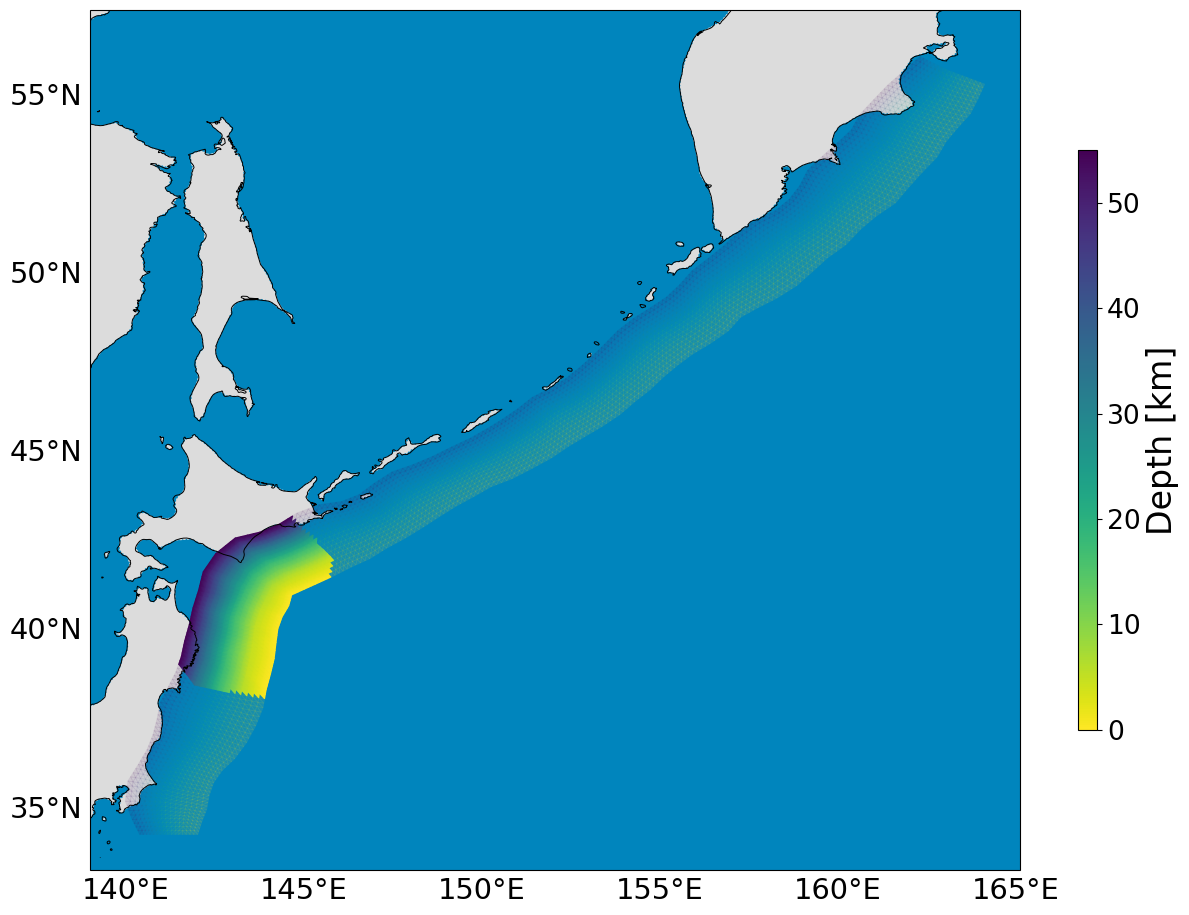

In [16]:
#plot barycenters for the specified combination of Mw and scaling name
Mw=8.8846
scaling='Murotani'
Rupture_area_id=3

print(f'PLOT BARYCENTERS FOR  Mw={Mw} and SCALING NAME: {scaling}')

fig = plt.figure(figsize=(15, 15))
subplots=111
#generate default basemap
fig,ax=Slab_obj.plot_basemap(fig,subplots)


#plot rupturing area
Slab_obj.plot_rupture_area(Mw,scaling,Rupture_area_id,ax,fig,True)
#Slab_obj.plot_boundary(ax)

Finally, write the output files

In [17]:
#Write Output
Slab_obj.write_output_rupture_areas()
#generate folder tree for outputs
Slab_obj.generate_foldertree_slip()

Writing Output
Magnitude bin # 15 - Mw=8.8846
Magnitude bin # 16 - Mw=8.9588
Magnitude bin # 17 - Mw=9.0260
Magnitude bin # 18 - Mw=9.0869
Magnitude bin # 19 - Mw=9.1419


### SLIP DISTRIBUTION COMPUTATION ###

In [18]:
#compute slipe distributions
Slab_obj.slip_distribution()

Computing slip distributions for the homogeneous and variable rigidity cases 
/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/homogeneous_mu/8_8846/Murotani


 starting ...
 Number of scenarios is         180


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/homogeneous_mu/8_8846/Strasser


 starting ...
 Number of scenarios is         200


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/homogeneous_mu/8_9588/Murotani


 starting ...
 Number of scenarios is         155


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/homogeneous_mu/8_9588/Strasser


 starting ...
 Number of scenarios is         180


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/homogeneous_mu/9_0260/Murotani


 starting ...
 Number of scenarios is         130


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/homogeneous_mu/9_0260/Strasser


 starting ...
 Number of scenarios is         165


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/homogeneous_mu/9_0869/Murotani


 starting ...
 Number of scenarios is         115


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/homogeneous_mu/9_0869/Strasser


 starting ...
 Number of scenarios is         145


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/homogeneous_mu/9_1419/Murotani


 starting ...
 Number of scenarios is          80


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/homogeneous_mu/9_1419/Strasser


 starting ...
 Number of scenarios is         125


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/variable_mu/8_8846/Murotani


 starting ...
 Number of scenarios is         180


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/variable_mu/8_8846/Strasser


 starting ...
 Number of scenarios is         200


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/variable_mu/8_9588/Murotani


 starting ...
 Number of scenarios is         155


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/variable_mu/8_9588/Strasser


 starting ...
 Number of scenarios is         180


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/variable_mu/9_0260/Murotani


 starting ...
 Number of scenarios is         130


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/variable_mu/9_0260/Strasser


 starting ...
 Number of scenarios is         165


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/variable_mu/9_0869/Murotani


 starting ...
 Number of scenarios is         115


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/variable_mu/9_0869/Strasser


 starting ...
 Number of scenarios is         145


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/variable_mu/9_1419/Murotani


 starting ...
 Number of scenarios is          80


/home/mmojica10/pyANTI-FASc/Tohoku_testK_M90_E14237_N3832_slip_KuJ/variable_mu/9_1419/Strasser


 starting ...
 Number of scenarios is         125


PLOT SLIP DISTRIBUTION FOR  Mw=8.8846 and SCALING NAME: Murotani


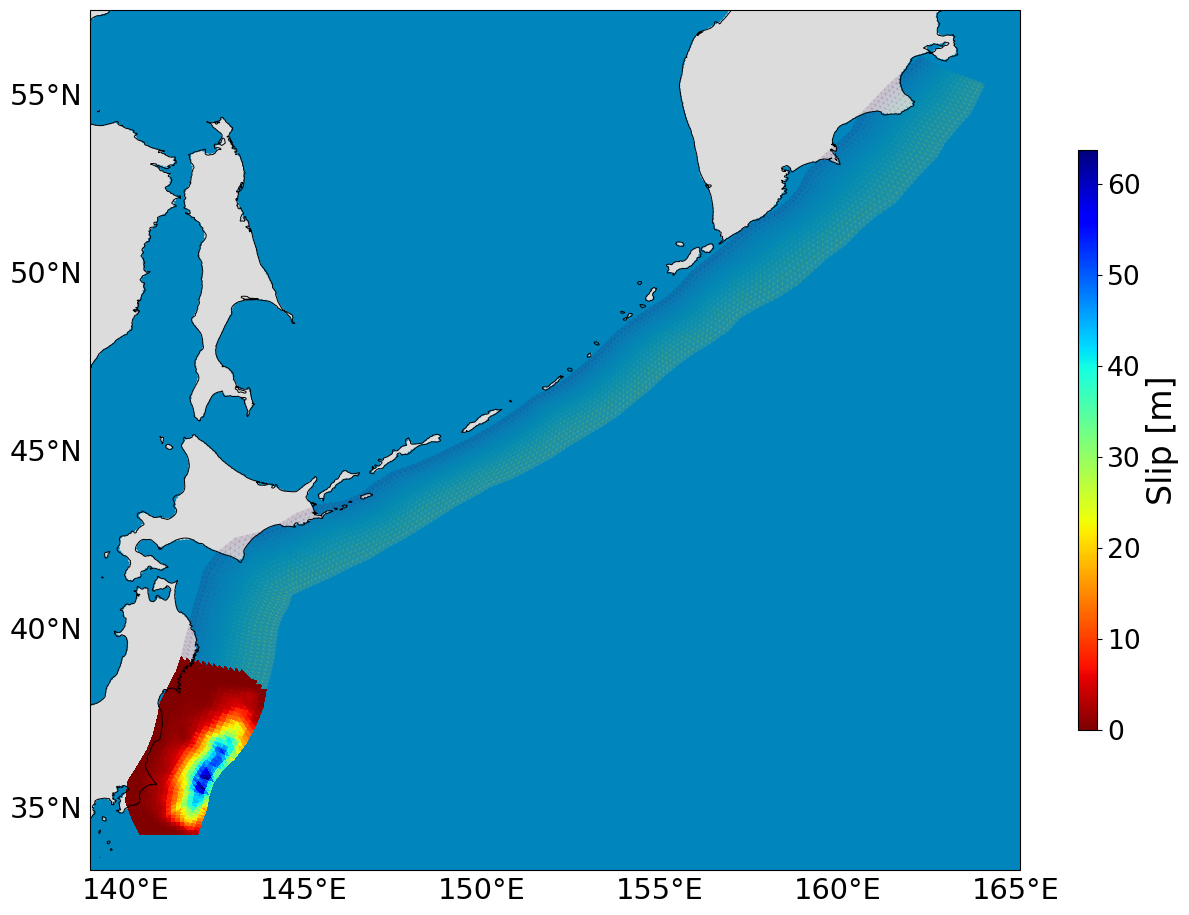

In [19]:
#plot slip distribution for the specified combination of Mw and scaling name
Mw=8.8846
scaling='Murotani'
Rupture_area_id=1

print(f'PLOT SLIP DISTRIBUTION FOR  Mw={Mw} and SCALING NAME: {scaling}')

fig = plt.figure(figsize=(15, 15))
subplots=111
#generate default basemap
fig,ax=Slab_obj.plot_basemap(fig,subplots)

#plot rupturing area
Slab_obj.plot_slip_dist(Mw,scaling,Rupture_area_id,ax,fig,True,True)